## Springboard Data Science Track Capstone Project 1
### Histopathologic Cancer Detection
### by Morgan Fry
### Baseline Model

Now that we have done the data wrangling and some exploratory data analysis we are going to  try to build a baseline image classification model based. We will try a logistic regression to begin with.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

from sklearn.ensemble import RandomForestClassifier


In [2]:
#load data 
y_d=pickle.load(open("y.p","rb"))
X_d=pickle.load(open("X.p","rb"))
#X_v_d=pickle.load(open("X_vect.p","rb"))

We should note at this point that the positive group is defined as having one 

In [3]:
#organize data into dataframes
#to save computational time at this point, we'll use the cropped images
X_crop_d={}
for each in X_d.items():
    X_crop_d.update({each[0]:each[1][31:63,31:63].flatten()})

In [4]:
X_crop_df=pd.DataFrame.from_dict(X_crop_d,orient='index')

In [5]:

Xy_crop_df=X_crop_df.merge(y_d,right_on='id',left_index=True)

In [6]:
Xy_crop_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3064,3065,3066,3067,3068,3069,3070,3071,id,label
0,244,243,245,245,247,248,245,247,248,244,...,249,245,248,247,243,245,244,240,f38a6374c348f90b587e046aac6079959adf3835,0
1,253,252,254,250,247,249,234,231,233,255,...,249,249,249,249,249,248,250,250,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,184,174,187,195,162,189,177,148,174,173,...,199,226,168,160,183,199,193,212,755db6279dae599ebb4d39a9123cce439965282d,0
3,173,106,173,218,139,206,172,98,158,191,...,85,145,177,106,169,191,118,186,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,74,36,66,82,39,96,212,178,242,119,...,20,80,105,64,121,77,27,81,068aba587a4950175d04c680d38943fd488d6a9d,0


In [7]:
#save for later notebooks
Xy_crop_df.to_csv('Xy_crop_df.csv')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(Xy_crop_df.iloc[:,:3072].values,
                                                    Xy_crop_df.label.values)

In [9]:
#scale the data
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
clf = LogisticRegression(n_jobs=-1)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Classification Report (train)
              precision    recall  f1-score   support

           0       0.72      0.83      0.77     98181
           1       0.68      0.52      0.59     66837

    accuracy                           0.71    165018
   macro avg       0.70      0.68      0.68    165018
weighted avg       0.71      0.71      0.70    165018

Classification Report (test)
              precision    recall  f1-score   support

           0       0.72      0.83      0.77     32727
           1       0.67      0.52      0.59     22280

    accuracy                           0.70     55007
   macro avg       0.69      0.67      0.68     55007
weighted avg       0.70      0.70      0.69     55007

Confusion Matrix:
[[27086  5641]
 [10720 11560]]


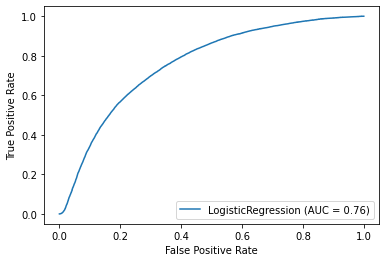

In [13]:
print('Classification Report (train)')
print(classification_report(y_train,clf.predict(X_train)))
print('Classification Report (test)')
pred=clf.predict(X_test)
print(classification_report(y_test,pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test,pred))
plot_roc_curve(clf,X_test,y_test)
plt.show()

A simple logistic regression does an inadequate job for this problem. We are looking to identify samples with cancerous cells in images. What measure shoul we be aiming for? There are a few factors to consider:
* Both false negatives and false positives matter. 
More false positives among a population in which the positive condition is rare means that even with a high accuracy a positive result can still mean a low chance of the condition tested for. More false negatives are even more important as that can mean sick people do not get treatment they need.
* There are about 50% more negative than positive samples in this dataset, so as you see above there is much better recall for negative samples than positive. 

Given these factors using the F1 score for the Positive case is the proper metric to judge the classifier by at this point. That said, the Kaggle Competition that the dataset was taken from defines a successful model as haveing .095 AUC, so we will look at this metric as well.

Looking at the results, we can tell a few things:
* The F1 score for Positive cases over the test set is .59, for Negatives .77. 
* Accordingly, the confusion matrix shows about twice as many false negatives (10577) as false positives (5720)
* The numbers are all similar for the train and test set, indicating the model isn't overfit.

In summary, we need a rather better model than this. For instance, in teh Kaggle competition that this dataset was taken from, a succesful model is defined as one having at least 0.95 area under the ROC curve. We might be able to eek out a little better results with tuning some of the parameters of the logistic regression, but ultimately we need to find a more robust strategy. Maybe a SVM or random forest or ultimately a neural net.